In [1]:

import rdflib
import oxrdflib
import loader
import discourse
import pandas as pd
from rdflib import Graph, Namespace
from rdflib.namespace import RDF, RDFS

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2

datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_SubContext [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.6894989013671875 seconds
* Owlready * Reparenting datamodels_rdf.FactSubject: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactPredicate: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactObject: {datamodels_rdf.Contains, owl.ObjectProperty} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.ToClass: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {owl.Obje

In [2]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g


In [3]:

def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows


In [4]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context", 
             "SubContext" : "SubContext"}
# job_def is in the form (Serialization, key, data )
job_def_load_entities = ("Entity Load", loader.onto.EntityAttributeRecord , serial_key, get_data_rows("model_entities.csv")  )
batch_manifest = [job_def_load_entities]

In [5]:
discourse.onto.base_iri

'http://www.semanticweb.org/tomk/ontologies/2022/11/discourse#'

In [6]:
# Create Empty Graph
test = Graph()
test.parse ("datamodels_rdf.owl", format='xml')
test.parse ("discourse.owl", format='xml')
dmns = Namespace(loader.onto.base_iri)
test.bind('dm', dmns, override=True, replace=True)
discns = Namespace(discourse.onto.base_iri)
test.bind('disc', discns, override=True, replace=True)

test.bind('rdfs', RDFS)
#namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

In [7]:
qtest = loader.load_data("test", batch_manifest=batch_manifest, rdflib_graph=test)

count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 16


In [8]:

data_load_objects_sparql = """
SELECT (count(?s) as ?count) ?t
WHERE 
    {
        ?s a ?t .
    }
GROUP BY ?t
"""
results = qtest.query(data_load_objects_sparql)

In [9]:
sorted(filter(lambda f: any([x in f[0] for x in ["discourse", "datamodel"]]),[("/".join(r[1].toPython().split("/")[-1:]), r[0].toPython())  for r in results]), key=lambda x: x[1])[::-1]


[('discourse#Declaration', 288),
 ('discourse#Posit', 104),
 ('datamodel#Mapping', 20),
 ('discourse#Discourse', 19),
 ('datamodel#RowNode', 17),
 ('datamodel#Attribute', 14),
 ('datamodel#MetaClass', 10),
 ('datamodel#Class', 4),
 ('datamodel#MetaDataProperty', 4),
 ('datamodel#MetaProperty', 2),
 ('datamodel#Serialization', 2),
 ('datamodel#Context', 2),
 ('datamodel#ModelDomain', 1),
 ('datamodel#JobNode', 1),
 ('datamodel#Model', 1),
 ('datamodel#BatchNode', 1)]

In [10]:
# TODO: Find the top-level structural nodes and demonstrate that the set of declarations associated to a full batch 
# can be extracted.

# Once that's achievable and performant, repeat for a second load, and generate a diff report filtering out which
# assertions are Create, Update or Delete type (likely only binary create and delete)

data_load_objects_sparql = """
CONSTRUCT 
WHERE 
    {
        ?batch_node a dm:BatchNode;
                    rdfs:label ?batch_node_label.
        ?x ?p ?batch_node .
        ?x rdfs:label ?x_label.
        ?x rdf:type ?x_type.
        ?x rdf:type ?y .
        ?x ?q ?z.
        ?z rdf:type ?a.
        ?z rdfs:label ?b.
        
    } 
"""
#results = qtest.query(data_load_objects_sparql)
#(list(results))
#visualize(t2rdflibg(results))

In [11]:
batch_load_labels_q = """
                        SELECT ?digest
                        WHERE 
                            {
                                ?batch_node a dm:BatchNode;
                                            rdfs:label ?batch_node_label.  
                                ?job_node dm:MemberOf ?batch_node.
                                ?job_node rdfs:label ?job_node_label.
                                ?row_node dm:MemberOf ?job_node.
                                ?row_node rdfs:label ?row_node_label.
                                ?row_node disc:Proposes ?d.
                                ?d disc:DiscourseContains ?p.
                                ?p disc:Digest ?digest.

                                
                                

                            } 
                        """
    

results = qtest.query(batch_load_labels_q)
# From the results, which contain only DIGEST objects, extract the triples and construct this image
r_triples=[discourse.longform_to_triple(r[0]) for r in results]
visualize(t2rdflibg(r_triples))

In [12]:
# TODO: Find the top-level structural nodes and demonstrate that the set of declarations associated to a full batch 
# can be extracted.

# Once that's achievable and performant, repeat for a second load, and generate a diff report filtering out which
# assertions are Create, Update or Delete type (likely only binary create and delete)


def pull_batch_content(g, batch_node):
    batch_load_labels_q = """
                        SELECT ?batch_node ?batch_node_label ?job_node ?job_node_label ?row_node ?row_node_label
                        WHERE 
                            {
                                ?batch_node a dm:BatchNode;
                                            rdfs:label ?batch_node_label.  
                                ?job_node dm:MemberOf ?batch_node.
                                ?job_node rdfs:label ?job_node_label.
                                ?row_node dm:MemberOf ?job_node.
                                ?row_node rdfs:label ?row_node_label.
                                
                                

                            } 
                        """
    results = [r[0] for r in qtest.query(batch_load_labels_q) if batch_label.lower() in r[1].lower()]
    results = [r for r in qtest.query(batch_load_labels_q) if batch_label.lower() in r[1].lower()]
    return results
#results = pull_batch_content(qtest, "test")
#pd.DataFrame(results)

In [13]:
job_def_load_entities = ("Entity Load 2", loader.onto.EntityAttributeRecord , serial_key, get_data_rows("model_entities_v2.csv")  )
batch_manifest = [job_def_load_entities]
qtest = loader.load_data("test_v2", batch_manifest=batch_manifest, rdflib_graph=qtest)


count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 17
count of mastered_row_triples 16


In [14]:

data_load_objects_sparql = """
SELECT (count(?s) as ?count) ?t
WHERE 
    {
        ?s a ?t .
    }
GROUP BY ?t
"""
results = qtest.query(data_load_objects_sparql)
sorted(filter(lambda f: any([x in f[0] for x in ["discourse", "datamodel"]]),[("/".join(r[1].toPython().split("/")[-1:]), r[0].toPython())  for r in results]), key=lambda x: x[1])[::-1]



[('discourse#Declaration', 576),
 ('discourse#Posit', 109),
 ('discourse#Discourse', 38),
 ('datamodel#RowNode', 34),
 ('datamodel#Mapping', 20),
 ('datamodel#Attribute', 15),
 ('datamodel#MetaClass', 10),
 ('datamodel#Class', 4),
 ('datamodel#MetaDataProperty', 4),
 ('datamodel#MetaProperty', 2),
 ('datamodel#Serialization', 2),
 ('datamodel#Context', 2),
 ('datamodel#JobNode', 2),
 ('datamodel#BatchNode', 2),
 ('datamodel#ModelDomain', 1),
 ('datamodel#Model', 1)]

In [15]:
results = qtest.query(batch_load_labels_q)
print(len(results))
# From the results, which contain only DIGEST objects, extract the triples and construct this image
r_triples=[discourse.longform_to_triple(r[0]) for r in results]
visualize(t2rdflibg(r_triples))

0


In [16]:
q="""SELECT ?batch_node 
WHERE {
    ?batch_node a dm:BatchNode.
}"""
batch_nodes = list(qtest.query(q))
batch_nodes

[(rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/118cfa3310af4a7f88a2b3ed5cd242ae')),
 (rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/0ba5aed52bd64447a1db786e31d93779'))]

In [17]:
batch_load_labels_q = """
                        SELECT ?digest
                        WHERE 
                            {
                                 %%bn%% a dm:BatchNode;
                                            rdfs:label ?batch_node_label.  
                                ?job_node dm:MemberOf ?batch_node.
                                ?job_node rdfs:label ?job_node_label.
                                ?row_node dm:MemberOf ?job_node.
                                ?row_node rdfs:label ?row_node_label.
                                ?row_node disc:Proposes ?discourse.
                                ?discourse disc:DiscourseContains ?decl.
                                ?decl disc:Posits ?p.
                                ?p disc:Digest ?digest.
                                

                            } 
                        """.replace("%%bn%%", batch_nodes[1][0].n3())
batch_load_labels_q

results = qtest.query(batch_load_labels_q)
print(len(results))
# From the results, which contain only DIGEST objects, extract the triples and construct this image
#r_triples=[discourse.longform_to_triple(r[0]) for r in results]
#visualize(t2rdflibg(r_triples))

576


In [18]:
batch_nodes[0][0].n3()

'<http://www.semanticweb.org/tomk/ontologies/2022/9/118cfa3310af4a7f88a2b3ed5cd242ae>'

In [22]:
discourse_q = """       SELECT ?digest
                        WHERE 
                            {
                                BIND (%%bn%% as ?batch_node).
                                ?job_node dm:MemberOf ?batch_node.
                                ?row_node dm:MemberOf ?job_node.
                                ?row_node disc:Proposes ?discourse.
                                ?discourse disc:DiscourseContains ?decl.
                                ?decl disc:Posits ?p.
                                ?p disc:Digest ?digest
                            }
                        """

qq = discourse_q.replace("%%bn%%", batch_nodes[0][0].n3())
print(qq)
results = qtest.query(qq)
b_0_results = set(results)
print(len(b_0_results))

qq = discourse_q.replace("%%bn%%", batch_nodes[1][0].n3())
print(qq)
results = qtest.query(qq)
b_1_results = set(results)
print(len(b_1_results))
#visualize(t2rdflibg(results))

       SELECT ?digest
                        WHERE 
                            {
                                BIND (<http://www.semanticweb.org/tomk/ontologies/2022/9/118cfa3310af4a7f88a2b3ed5cd242ae> as ?batch_node).
                                ?job_node dm:MemberOf ?batch_node.
                                ?row_node dm:MemberOf ?job_node.
                                ?row_node disc:Proposes ?discourse.
                                ?discourse disc:DiscourseContains ?decl.
                                ?decl disc:Posits ?p.
                                ?p disc:Digest ?digest
                            }
                        
104
       SELECT ?digest
                        WHERE 
                            {
                                BIND (<http://www.semanticweb.org/tomk/ontologies/2022/9/0ba5aed52bd64447a1db786e31d93779> as ?batch_node).
                                ?job_node dm:MemberOf ?batch_node.
                                ?row_node dm:M

In [23]:
len(b_0_results),len(b_1_results)
len(set(b_0_results)), len(set(b_1_results))
pd.DataFrame(set(b_0_results).union(set(b_1_results)))

,0
0,<http://www.semanticweb.org/tomk/ontologies/20...
1,<http://www.semanticweb.org/tomk/ontologies/20...
2,<http://www.semanticweb.org/tomk/ontologies/20...
3,<http://www.semanticweb.org/tomk/ontologies/20...
4,<http://www.semanticweb.org/tomk/ontologies/20...
...,...
104,<http://www.semanticweb.org/tomk/ontologies/20...
105,<http://www.semanticweb.org/tomk/ontologies/20...
106,<http://www.semanticweb.org/tomk/ontologies/20...
107,<http://www.semanticweb.org/tomk/ontologies/20...


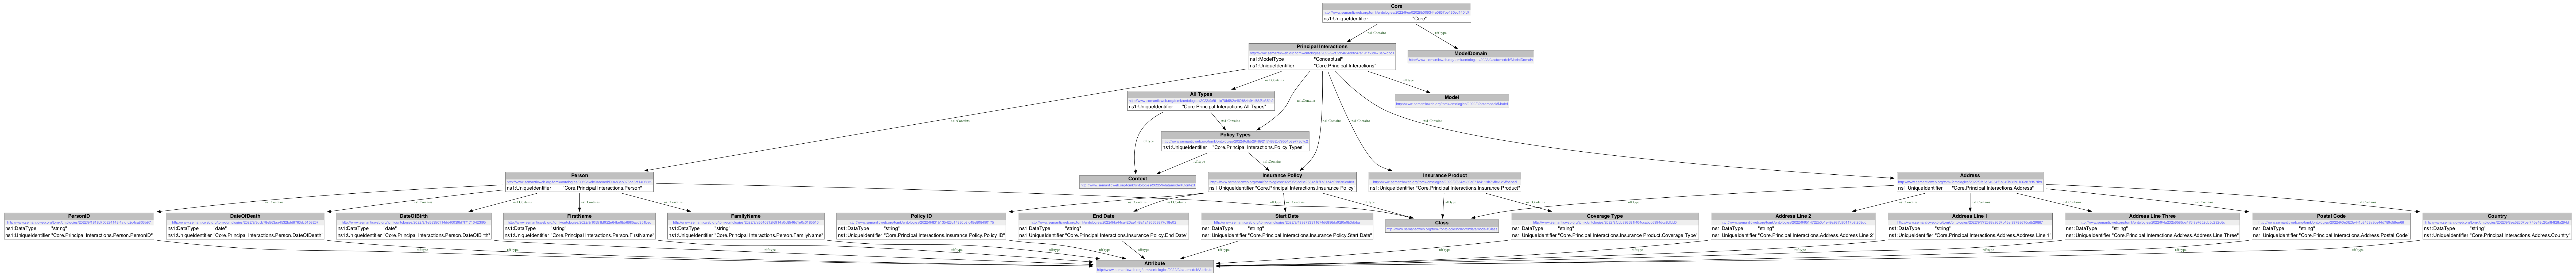

In [24]:

r_triples_0=[discourse.longform_to_triple(r[0]) for r in b_0_results]
visualize(t2rdflibg(r_triples_0))

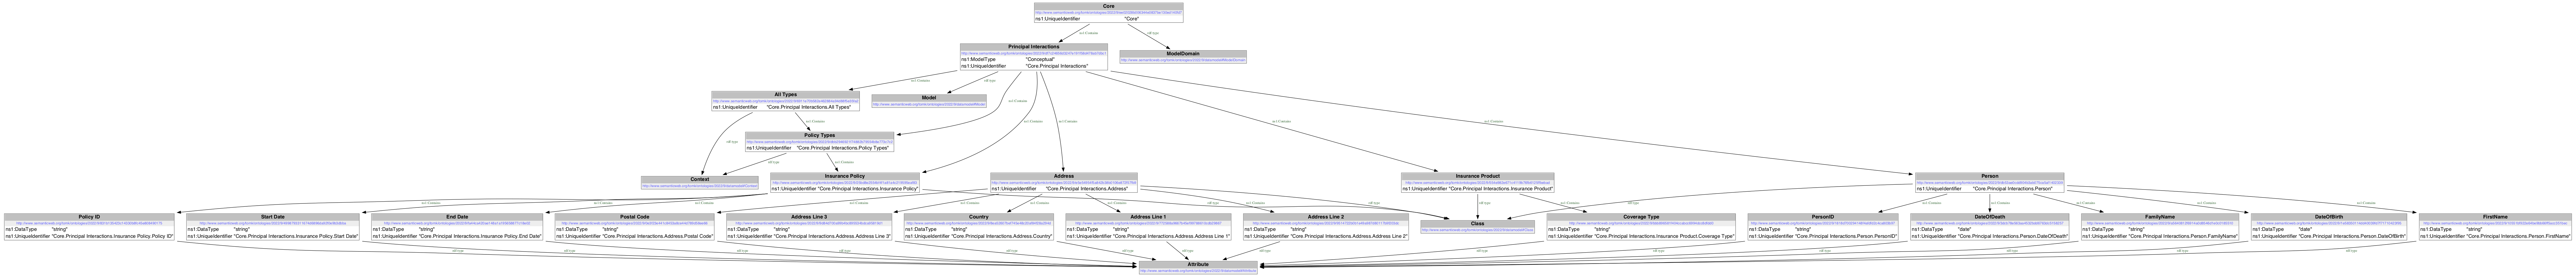

In [25]:
r_triples_1=[discourse.longform_to_triple(r[0]) for r in b_1_results]
visualize(t2rdflibg(r_triples_1))

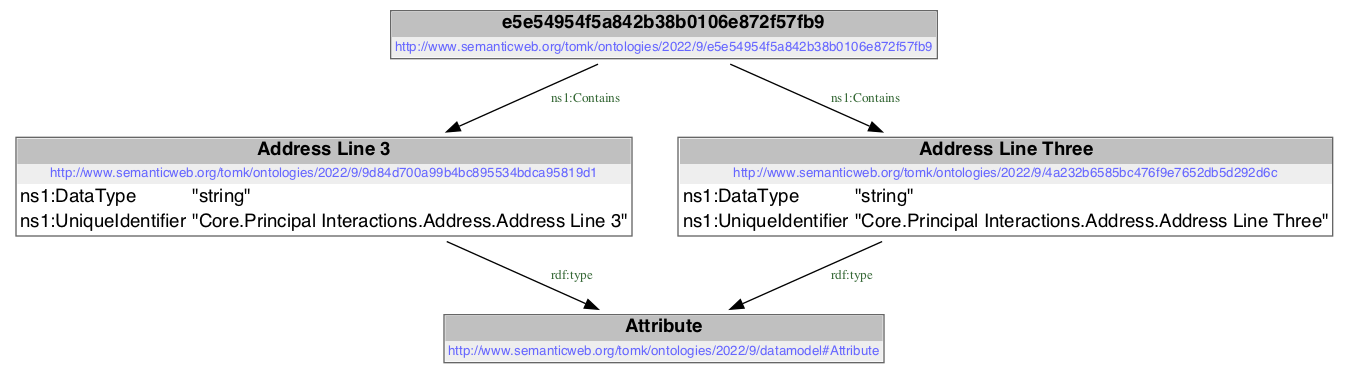

In [29]:
visualize(t2rdflibg(set(r_triples_0).symmetric_difference(set(r_triples_1))))